In [1]:
from data_gathering import historical_quiz_data, historical_quiz_df, combined_df, current_quiz_df, current_quiz_data
import pandas as pd



current quiz data
quiz submission data
historical quiz data


In [2]:
#to analyze trends based on topic column we must extract it from the nested dict quiz
historical_quiz_df['topic'] = historical_quiz_df['quiz'].apply(lambda x: x['topic'])
historical_quiz_df['total_questions'] = historical_quiz_df['quiz'].apply(lambda x: x['questions_count'])

#convert % to a numeric typr for easier calcualtion
historical_quiz_df['accuracy'] = historical_quiz_df['accuracy'].apply(lambda x: float(str(x).replace('%', '')) if isinstance(x, str) else x)


#calculate trends in historical data

#make sure to handle non numeric or missing values so it doesnt intefere with the calcualtion

numeric_columns = ['score', 'accuracy', 'speed', 'correct_answers', 'incorrect_answers', 'total_questions']
for column in numeric_columns:
    historical_quiz_df[column] = pd.to_numeric(historical_quiz_df[column], errors='coerce')


trends = historical_quiz_df.groupby('topic').agg({
    'score':'mean',
    'accuracy':'mean',
    'speed':'mean',
    'correct_answers':'mean',
    'incorrect_answers':'mean',
    'total_questions':'mean'
    }).reset_index()

trends.rename(columns={
    'score':'avg_score',
    'accuracy': 'avg_accuracy',
    'speed': 'avg_speed',
    'correct_answers': 'avg_correct_answers',
    'incorrect_answers': 'avg_incorrect_answers',
    'total_questions':'avg_total_questions'
    }, inplace=True)

print("performance trends by topic:")
print(trends)

trends.to_csv('trends_data.csv')

performance trends by topic:
                                      topic   avg_score  avg_accuracy  \
0               Body Fluids and Circulation   86.666667     72.333333   
1              Body Fluids and Circulation    54.666667     80.000000   
2                        Human Reproduction   40.000000     38.000000   
3                       Reproductive Health   52.000000     43.000000   
4              Respiration and Gas Exchange   24.000000     66.000000   
5                 human health and disease   112.000000     93.000000   
6                 microbes in human welfare   76.000000    100.000000   
7  principles of inheritance and variation    12.000000     30.000000   
8                      reproductive health    52.000000     92.000000   

    avg_speed  avg_correct_answers  avg_incorrect_answers  avg_total_questions  
0   98.666667            21.666667               8.000000                100.0  
1   92.666667            13.666667               3.333333                 23.0

In [3]:
import pandas as pd

def compare_student_to_history(student_data, historical_data):
    # Extract the topic from the student's recent submission
    student_topic = student_data['quiz']['topic']
    
    # Filter the historical data to get all entries for the same topic and student
    student_history = historical_data[historical_data['student_id'] == student_data['student_id']]
    topic_history = student_history[student_history['topic'] == student_topic]
    
    if topic_history.empty:
        print(f"No historical data available for the topic {student_topic} for student {student_data['student_id']}")
        return None
    
    # Compute averages for the student's historical data on the same topic
    avg_score = topic_history['score'].mean()
    avg_accuracy = topic_history['accuracy'].mean()
    
    # Create a comparison result
    comparison = {
        'student_id': student_data['student_id'],
        'topic': student_topic,
        'recent_score': student_data['score'],
        'avg_score': avg_score,
        'recent_accuracy': student_data['accuracy'],
        'avg_accuracy': avg_accuracy
    }
    
    # Generate feedback based on the comparison
    feedback = ""
    if student_data['score'] > avg_score:
        feedback += f"Good job! Your recent score of {student_data['score']} is above the average score of {avg_score}.\n"
    elif student_data['score'] < avg_score:
        feedback += f"Your score of {student_data['score']} is below the average of {avg_score}. Focus on improving your knowledge in this topic.\n"
    
    if student_data['accuracy'] > avg_accuracy:
        feedback += f"Great! Your recent accuracy of {student_data['accuracy']}% is above the average accuracy of {avg_accuracy}%.\n"
    elif student_data['accuracy'] < avg_accuracy:
        feedback += f"Your accuracy of {student_data['accuracy']}% is below the average of {avg_accuracy}%. Consider reviewing more questions in this topic.\n"
    
    # Return the comparison and feedback
    return comparison, feedback

# Example usage
student_data = {
    'student_id': 12345,
    'quiz': {'topic': 'Human Physiology'},
    'score': 80,
    'accuracy': 85
}

# Assuming historical_data is a DataFrame with data on past quizzes
historical_data = pd.DataFrame({
    'student_id': [12345, 12345, 12345, 12345],
    'topic': ['Human Physiology', 'Human Physiology', 'Human Physiology', 'Human Physiology'],
    'score': [70, 75, 85, 90],
    'accuracy': [70, 80, 90, 95]
})

comparison_result, feedback = compare_student_to_history(student_data, historical_data)

# Display the comparison
if comparison_result:
    print("Comparison of Recent Performance to Historical Data:")
    for key, value in comparison_result.items():
        print(f"{key}: {value}")
    
    print("\nFeedback for the Student:")
    print(feedback)


Comparison of Recent Performance to Historical Data:
student_id: 12345
topic: Human Physiology
recent_score: 80
avg_score: 80.0
recent_accuracy: 85
avg_accuracy: 83.75

Feedback for the Student:
Great! Your recent accuracy of 85% is above the average accuracy of 83.75%.



In [4]:
# check for non-numeric values in accuracy
#print(historical_quiz_df['accuracy'].unique())
#print(trends['avg_accuracy'].unique())


In [5]:
def suggest_improvements(comparison):
    if not comparison:
        return None
    
    suggestions = []
    
    # Score improvement suggestion
    if comparison['recent_score'] < comparison['avg_score']:
        suggestions.append(f"Your recent score of {comparison['recent_score']} is lower than the average score of {comparison['avg_score']}. Focus on reviewing the topics where you struggled the most.")

    elif comparison['recent_score'] == comparison['avg_score']:
        suggestions.append(f"Your score of {comparison['recent_score']} matches the average score. Consider reviewing weak areas to push your performance above average.")

    else:
        suggestions.append(f"Great job! Your score of {comparison['recent_score']} is above the average score of {comparison['avg_score']}. Keep up the good work!")

    # Accuracy improvement suggestion
    if comparison['recent_accuracy'] < comparison['avg_accuracy']:
        suggestions.append(f"Your accuracy of {comparison['recent_accuracy']}% is lower than the average accuracy of {comparison['avg_accuracy']}%. Focus on understanding the questions more thoroughly to improve accuracy.")

    elif comparison['recent_accuracy'] == comparison['avg_accuracy']:
        suggestions.append(f"Your accuracy of {comparison['recent_accuracy']}% matches the average accuracy of {comparison['avg_accuracy']}%. Work on refining your understanding to increase this percentage.")

    else:
        suggestions.append(f"Well done! Your accuracy of {comparison['recent_accuracy']}% exceeds the average accuracy of {comparison['avg_accuracy']}%. Keep practicing to maintain or improve this performance.")

    # Speed improvement suggestion
    if comparison['recent_speed'] < comparison['avg_speed']:
        suggestions.append(f"Your response speed of {comparison['recent_speed']} is slower than the average speed of {comparison['avg_speed']}. Practice more to improve your speed while maintaining accuracy.")

    elif comparison['recent_speed'] == comparison['avg_speed']:
        suggestions.append(f"Your response speed of {comparison['recent_speed']} matches the average speed. Challenge yourself to answer slightly faster without compromising on quality.")

    else:
        suggestions.append(f"Great work! Your speed of {comparison['recent_speed']} is better than the average speed of {comparison['avg_speed']}. Continue to focus on maintaining this pace.")

    # Correct answers improvement suggestion
    if comparison['recent_correct_answers'] < comparison['avg_correct_answers']:
        suggestions.append(f"Your correct answers count of {comparison['recent_correct_answers']} is lower than the average count of {comparison['avg_correct_answers']}. Review your weak areas and target improving this number.")

    elif comparison['recent_correct_answers'] == comparison['avg_correct_answers']:
        suggestions.append(f"Your correct answers count of {comparison['recent_correct_answers']} matches the average. Continue to focus on areas of improvement to increase this count.")

    else:
        suggestions.append(f"Fantastic! Your correct answers count of {comparison['recent_correct_answers']} exceeds the average count of {comparison['avg_correct_answers']}. Keep practicing more challenging questions.")

    # Incorrect answers improvement suggestion
    if comparison['recent_incorrect_answers'] > comparison['avg_incorrect_answers']:
        suggestions.append(f"Your incorrect answers count of {comparison['recent_incorrect_answers']} is higher than the average of {comparison['avg_incorrect_answers']}. Focus on avoiding these mistakes by understanding the reasoning behind the questions you get wrong.")

    elif comparison['recent_incorrect_answers'] == comparison['avg_incorrect_answers']:
        suggestions.append(f"Your incorrect answers count of {comparison['recent_incorrect_answers']} matches the average. Aim to reduce this by being more confident and accurate in your answers.")

    else:
        suggestions.append(f"Great progress! Your incorrect answers count of {comparison['recent_incorrect_answers']} is lower than the average count of {comparison['avg_incorrect_answers']}. Keep focusing on minimizing mistakes.")

    return suggestions


# Example usage (with a comparison result):
comparison_result = {
    'student_id': 12345,
    'topic': 'Human Physiology',
    'recent_score': 75,
    'avg_score': 80,
    'recent_accuracy': 80,
    'avg_accuracy': 85,
    'recent_speed': 15,
    'avg_speed': 12,
    'recent_correct_answers': 16,
    'avg_correct_answers': 18,
    'recent_incorrect_answers': 4,
    'avg_incorrect_answers': 3
}

# Generate suggestions for improvement
improvement_suggestions = suggest_improvements(comparison_result)

# Display improvement suggestions
print("\nSuggestions for Improvement:")
if improvement_suggestions:
    for suggestion in improvement_suggestions:
        print(f"- {suggestion}")
else:
    print("No suggestions needed. Keep up the good work!")




Suggestions for Improvement:
- Your recent score of 75 is lower than the average score of 80. Focus on reviewing the topics where you struggled the most.
- Your accuracy of 80% is lower than the average accuracy of 85%. Focus on understanding the questions more thoroughly to improve accuracy.
- Great work! Your speed of 15 is better than the average speed of 12. Continue to focus on maintaining this pace.
- Your correct answers count of 16 is lower than the average count of 18. Review your weak areas and target improving this number.
- Your incorrect answers count of 4 is higher than the average of 3. Focus on avoiding these mistakes by understanding the reasoning behind the questions you get wrong.


In [6]:
def generate_recommendations(comparison_result):
    if not comparison_result:
        return {"message": "No data available for recommendations."}

    recommendations = {}
    weak_topics = []
    strong_topics = []

    # Analyze weak topics based on performance comparison
    if comparison_result['recent_score'] < comparison_result['avg_score']:
        weak_topics.append({
            "topic": comparison_result['topic'],
            "reason": f"Your recent score of {comparison_result['recent_score']} is below the average score of {comparison_result['avg_score']}.",
            "action": "Revise topic fundamentals and attempt related MCQs to strengthen your understanding."
        })

    if comparison_result['recent_accuracy'] < comparison_result['avg_accuracy']:
        weak_topics.append({
            "topic": comparison_result['topic'],
            "reason": f"Your recent accuracy of {comparison_result['recent_accuracy']}% is below the average accuracy of {comparison_result['avg_accuracy']}%.",
            "action": "Focus on improving accuracy by reviewing incorrect answers and identifying patterns in mistakes."
        })

    if comparison_result['recent_speed'] > comparison_result['avg_speed']:
        weak_topics.append({
            "topic": comparison_result['topic'],
            "reason": f"Your response speed of {comparison_result['recent_speed']} is slower than the average speed of {comparison_result['avg_speed']}.",
            "action": "Practice timed quizzes or work on faster decision-making strategies to improve response speed."
        })

    # Strong topics suggestions based on positive performance comparison
    if comparison_result['recent_score'] >= comparison_result['avg_score']:
        strong_topics.append({
            "topic": comparison_result['topic'],
            "reason": f"Your recent score of {comparison_result['recent_score']} is equal to or higher than the average score of {comparison_result['avg_score']}.",
            "action": "Continue practicing this topic to maintain or further improve your performance."
        })

    if comparison_result['recent_accuracy'] >= comparison_result['avg_accuracy']:
        strong_topics.append({
            "topic": comparison_result['topic'],
            "reason": f"Your recent accuracy of {comparison_result['recent_accuracy']}% matches or exceeds the average accuracy of {comparison_result['avg_accuracy']}%.",
            "action": "Keep up the good work! Reinforce your strong areas to maintain high accuracy."
        })

    if comparison_result['recent_speed'] <= comparison_result['avg_speed']:
        strong_topics.append({
            "topic": comparison_result['topic'],
            "reason": f"Your response speed of {comparison_result['recent_speed']} is better than or equal to the average speed of {comparison_result['avg_speed']}.",
            "action": "Great speed! Keep challenging yourself to maintain or improve this pace while focusing on accuracy."
        })

    recommendations['weak_topics'] = weak_topics
    recommendations['strong_topics'] = strong_topics

    return recommendations

# Example usage (with a comparison result):
comparison_result = {
    'student_id': 12345,
    'topic': 'Human Physiology',
    'recent_score': 75,
    'avg_score': 80,
    'recent_accuracy': 80,
    'avg_accuracy': 85,
    'recent_speed': 15,
    'avg_speed': 12,
    'recent_correct_answers': 16,
    'avg_correct_answers': 18,
    'recent_incorrect_answers': 4,
    'avg_incorrect_answers': 3
}

# Generate recommendations
recommendations = generate_recommendations(comparison_result)

# Display recommendations
print("\nRecommendations:")
if recommendations:
    print("Weak Topics:")
    for topic in recommendations['weak_topics']:
        print(f"- Topic: {topic['topic']}\n  Reason: {topic['reason']}\n  Action: {topic['action']}\n")
    
    print("Strong Topics:")
    for topic in recommendations['strong_topics']:
        print(f"- Topic: {topic['topic']}\n  Reason: {topic['reason']}\n  Action: {topic['action']}\n")
else:
    print("No recommendations available.")



Recommendations:
Weak Topics:
- Topic: Human Physiology
  Reason: Your recent score of 75 is below the average score of 80.
  Action: Revise topic fundamentals and attempt related MCQs to strengthen your understanding.

- Topic: Human Physiology
  Reason: Your recent accuracy of 80% is below the average accuracy of 85%.
  Action: Focus on improving accuracy by reviewing incorrect answers and identifying patterns in mistakes.

- Topic: Human Physiology
  Reason: Your response speed of 15 is slower than the average speed of 12.
  Action: Practice timed quizzes or work on faster decision-making strategies to improve response speed.

Strong Topics:


In [7]:
def define_student_persona(historical_data):
    total_quizzes = len(historical_data)
    avg_score = historical_data['score'].mean()
    avg_accuracy = historical_data['accuracy'].mean()

    # Label the student based on performance behavior
    if avg_score > 80 and avg_accuracy > 90:
        persona = "Top Performer"
        description = "Consistently excels with high scores and accuracy. A role model for others."
    elif avg_score > 60 and avg_accuracy > 70:
        persona = "Strategic Learner"
        description = "Steady performer with a strategic approach. Needs focus on weak areas to further improve."
    elif avg_score < 50 or avg_accuracy < 50:
        persona = "Needs Improvement"
        description = "Struggles with performance consistency. Requires focus on strengthening foundational knowledge and accuracy."

    # Identify the dominant subject based on the average score per topic
    dominant_topic = historical_data.groupby('topic')['score'].mean().idxmax()

    # Suggest improvements based on performance
    if persona == "Needs Improvement":
        improvement_suggestion = "Focus on practicing basic concepts, take additional quizzes on weaker topics, and review mistakes."
    elif persona == "Strategic Learner":
        improvement_suggestion = "Work on refining strategies for better accuracy and speed. Consider revising key concepts and increasing quiz attempts."
    else:
        improvement_suggestion = "Continue challenging yourself with advanced topics, and work on maintaining consistent high performance."

    return {
        "persona": persona,
        "description": description,
        "dominant_topic": dominant_topic,
        "avg_score": avg_score,
        "avg_accuracy": avg_accuracy,
        "improvement_suggestion": improvement_suggestion
    }

# Example usage (with a historical dataset):
historical_data = pd.DataFrame({
    'score': [85, 78, 92, 87, 75],
    'accuracy': [90, 80, 95, 88, 84],
    'topic': ['Body Fluids and Circulation', 'Body Fluids and Circulation', 'Genetics', 'Genetics', 'Body Fluids and Circulation']
})

# Generate student persona
student_persona = define_student_persona(historical_data)

# Display student persona details
print("\nStudent Persona:")
print(f"Persona: {student_persona['persona']}")
print(f"Description: {student_persona['description']}")
print(f"Dominant Topic: {student_persona['dominant_topic']}")
print(f"Average Score: {student_persona['avg_score']}")
print(f"Average Accuracy: {student_persona['avg_accuracy']}")
print(f"Improvement Suggestion: {student_persona['improvement_suggestion']}")




Student Persona:
Persona: Strategic Learner
Description: Steady performer with a strategic approach. Needs focus on weak areas to further improve.
Dominant Topic: Genetics
Average Score: 83.4
Average Accuracy: 87.4
Improvement Suggestion: Work on refining strategies for better accuracy and speed. Consider revising key concepts and increasing quiz attempts.


C:\Users\shash\AppData\Local\Temp\ipykernel_22048\3050511835.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=trends, x='topic', y='avg_score', palette='coolwarm')


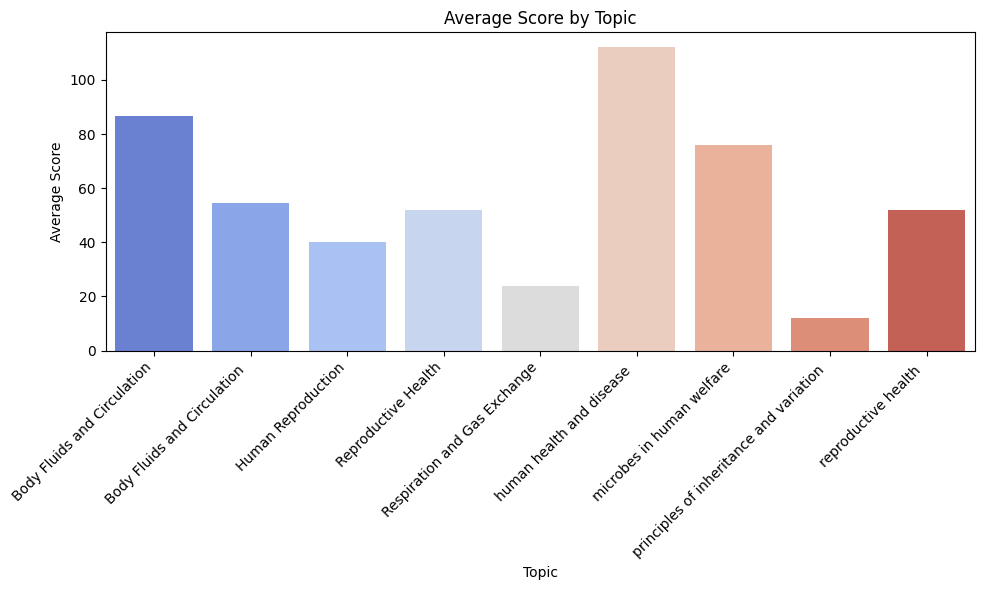

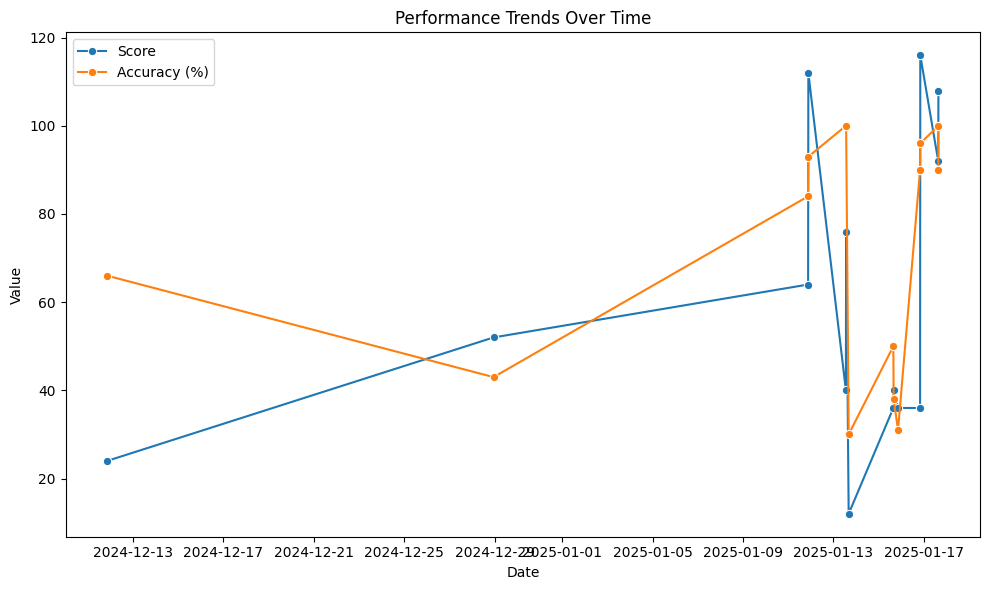

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_performance(historical_quiz_df, trends):

    historical_quiz_df['date'] = pd.to_datetime(historical_quiz_df['submitted_at'], errors='coerce')

    # Average score by topic
    plt.figure(figsize=(10, 6))
    sns.barplot(data=trends, x='topic', y='avg_score', palette='coolwarm')
    plt.xticks(rotation=45, ha='right')
    plt.title('Average Score by Topic')
    plt.xlabel('Topic')
    plt.ylabel('Average Score')
    plt.tight_layout()
    plt.show()

    # Trends in performance over time
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=historical_quiz_df, x='date', y='score', marker='o', label='Score')
    sns.lineplot(data=historical_quiz_df, x='date', y='accuracy', marker='o', label='Accuracy (%)')
    plt.title('Performance Trends Over Time')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Example of calling the function:
visualize_performance(historical_quiz_df, trends)


C:\Users\shash\AppData\Local\Temp\ipykernel_22048\164650822.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  student_data['date'] = pd.to_datetime(student_data['submitted_at'], errors='coerce')


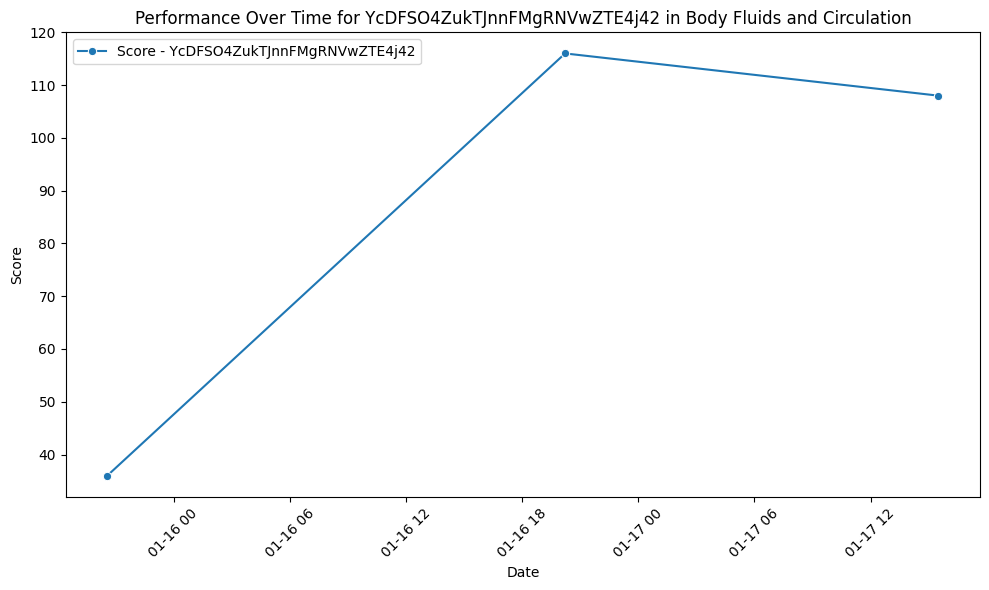

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_student_performance(historical_quiz_df, student_id, subject):
    # Filter data for the specific student and subject
    # Assuming `quiz` is a dictionary and the `topic` is inside `quiz['topic']`
    student_data = historical_quiz_df[(historical_quiz_df['user_id'] == student_id) & (historical_quiz_df['quiz'].apply(lambda x: x.get('topic', '') == subject))]
    
    if student_data.empty:
        print(f"No data available for student {student_id} in subject {subject}")
        return
    
    # Convert `submitted_at` to datetime if not already done
    student_data['date'] = pd.to_datetime(student_data['submitted_at'], errors='coerce')
    
    # Sort data by date (ascending)
    student_data_sorted = student_data.sort_values(by='date')
    
    # Plot performance over time (can use either 'score' or 'accuracy')
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=student_data_sorted, x='date', y='score', marker='o', label=f'Score - {student_id}')
    plt.title(f'Performance Over Time for {student_id} in {subject}')
    plt.xlabel('Date')
    plt.ylabel('Score')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Example usage: plot performance for a student with ID 'YcDFSO4ZukTJnnFMgRNVwZTE4j42' in 'Body Fluids and Circulation'
plot_student_performance(historical_quiz_df, 'YcDFSO4ZukTJnnFMgRNVwZTE4j42', 'Body Fluids and Circulation')


In [10]:
from fastapi import FastAPI, HTTPException
from pydantic import BaseModel
import pandas as pd
import logging

logging.basicConfig(level=logging.DEBUG)

# FastAPI app instance
app = FastAPI()

# Historical trends (example data)
trends = pd.DataFrame({
    "topic": ["Body Fluids and Circulation", "Respiration and Gas Exchange"],
    "avg_score": [85, 70],
    "avg_accuracy": [80.0, 75.0],
    "avg_speed": [10, 15],
    "avg_correct_answers": [20, 18],
    "avg_incorrect_answers": [5, 7],
})

# Pydantic models
class Quiz(BaseModel):
    topic: str

class QuizSubmission(BaseModel):
    quiz: Quiz
    score: float
    accuracy: str
    speed: int
    correct_answers: int
    incorrect_answers: int

@app.post("/analyze")
def analyze_performance(data: QuizSubmission):
    logging.debug(f"Received data: {data}")
    
    try:
        # Extract and clean recent submission
        recent_topic = data.quiz.topic
        recent_accuracy = float(data.accuracy.replace('%', '').strip())

        # Find the corresponding topic in trends
        topic_trend = trends[trends["topic"] == recent_topic]
        if topic_trend.empty:
            raise HTTPException(status_code=404, detail=f"No historical data available for topic: {recent_topic}")

        # Compare with trends
        comparison = {
            "topic": recent_topic,
            "recent_score": data.score,
            "avg_score": topic_trend["avg_score"].values[0],
            "recent_accuracy": recent_accuracy,
            "avg_accuracy": topic_trend["avg_accuracy"].values[0],
            "recent_speed": data.speed,
            "avg_speed": topic_trend["avg_speed"].values[0],
            "recent_correct_answers": data.correct_answers,
            "avg_correct_answers": topic_trend["avg_correct_answers"].values[0],
            "recent_incorrect_answers": data.incorrect_answers,
            "avg_incorrect_answers": topic_trend["avg_incorrect_answers"].values[0],
        }

        return {"comparison": comparison}

    except Exception as e:
        logging.error(f"Error occurred: {e}")
        raise HTTPException(status_code=500, detail=str(e))


In [11]:
from uvicorn import Config, Server

config = Config(app=app, host="127.0.0.1", port=8000)
server = Server(config)
await server.serve()